### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [148]:
data = pd.read_csv('data/coupons.csv')

In [158]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [160]:
#Missing Values
missing_values = data.isnull().sum()
display(missing_values[missing_values > 0])

display(data.describe())


car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [163]:
# Drop 'car' column since it has excessive missing values
data.drop(columns=['car'], inplace=True)

# Summary statistics
display(data.describe())

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


4. What proportion of the total observations chose to accept the coupon?



In [166]:
acceptance_rate = data['Y'].mean()
print(f"Proportion of customers who accepted the coupon: {acceptance_rate:.2%}")


Proportion of customers who accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

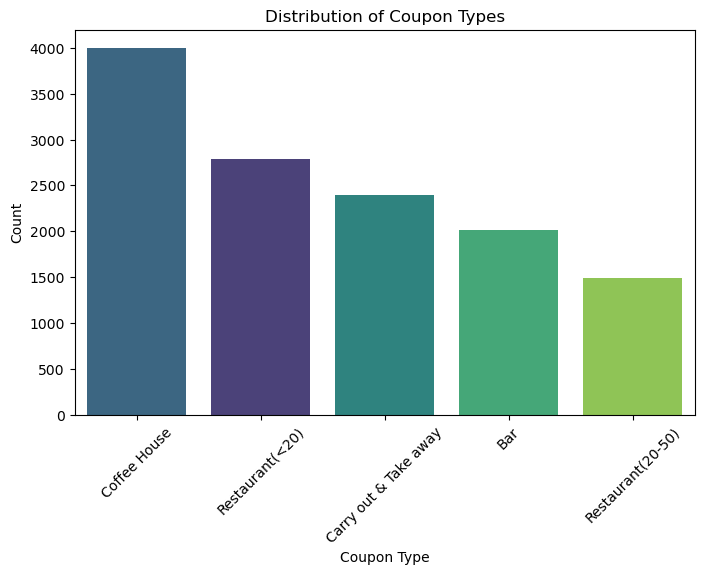

In [169]:
# Bar plot for the 'coupon' column
plt.figure(figsize=(8, 5))
sns.countplot(x='coupon', data=data, order=data['coupon'].value_counts().index, hue='coupon', legend=False, palette='viridis')
plt.title("Distribution of Coupon Types")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

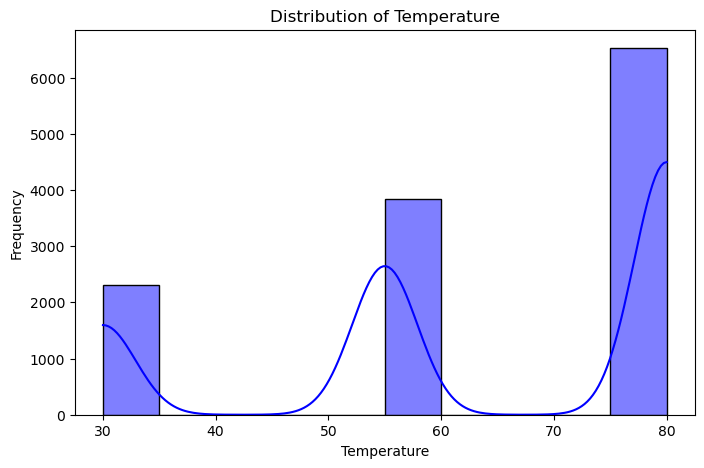

In [172]:
# Histogram for the 'temperature' column
plt.figure(figsize=(8, 5))
sns.histplot(data['temperature'], bins=10, kde=True, color='blue')
plt.title("Distribution of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

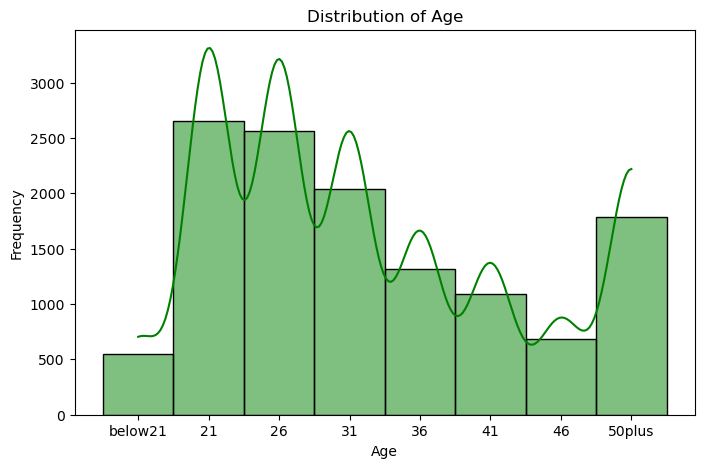

In [174]:
# Histogram for the 'age' column (EXTRA CREDIT)
plt.figure(figsize=(8, 5))
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
data['age'] = pd.Categorical(data['age'], categories=age_order, ordered=True)
sns.histplot(data.sort_values(by='age')['age'], bins=len(age_order), kde=True, color='green')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [176]:
# Create a new DataFrame containing only bar-related coupons
bar_coupons = data[data['coupon'] == 'Bar']

# Summary statistics
display(bar_coupons.describe())

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,2017.000000,2017.000000,2017.0,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,57.590481,0.433813,1.0,0.663361,0.252851,0.209222,0.790778,0.410015
std,17.950408,0.495723,0.0,0.472677,0.434754,0.406854,0.406854,0.491958
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. What proportion of bar coupons were accepted?


In [182]:
#Proportion of bar coupons accepted

bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"Proportion of customers who accepted the bar coupon: {bar_acceptance_rate:.2%}")

Proportion of customers who accepted the bar coupon: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [185]:
# Compare acceptance rate for those who go to a bar ≤3 times vs. >3 times per month
bar_coupons = bar_coupons.copy()
bar_coupons.loc[:, 'bar_visits_category'] = bar_coupons['Bar'].apply(lambda x: '≤3 times' if x in ['never', 'less1', '1~3'] else '>3 times')
acceptance_rates = bar_coupons.groupby('bar_visits_category')['Y'].mean()
print("Acceptance Rate by Bar Visit Frequency:")
print(acceptance_rates)

Acceptance Rate by Bar Visit Frequency:
bar_visits_category
>3 times    0.731818
≤3 times    0.370618
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [188]:
# Compare acceptance rate for drivers who go to a bar >1 time/month and are over 25 vs. others
bar_coupons.loc[:, 'over_25'] = bar_coupons['age'].apply(lambda x: 'Over 25' if x not in ['below21', '21', '25'] else '25 or younger')
bar_coupons.loc[:, 'bar_visits_over_1'] = bar_coupons['Bar'].apply(lambda x: 'More than once' if x in ['4~8', 'gt8'] else 'Once or less')
acceptance_comparison = bar_coupons.groupby(['bar_visits_over_1', 'over_25'])['Y'].mean()
print("Acceptance Rate by Bar Visit Frequency and Age:")
print(acceptance_comparison)

# Frequent bar-goers (more than once a month) are significantly more likely to accept bar coupons (~76-77%) 
# than infrequent visitors (~34-45%), regardless of age. Among infrequent visitors, younger individuals (≤25) are slightly more receptive (45%) 
# compared to older ones (34%). This suggests that bar coupon marketing should focus on frequent bar attendees, 
# while younger, infrequent visitors may still present an opportunity for engagement. Infrequent bar-goers may require stronger incentives, 
# such as limited-time offers or bundled discounts, to increase coupon acceptance.

Acceptance Rate by Bar Visit Frequency and Age:
bar_visits_over_1  over_25      
More than once     25 or younger    0.761905
                   Over 25          0.772059
Once or less       25 or younger    0.451247
                   Over 25          0.344953
Name: Y, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [191]:
# Compare acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry
bar_coupons['non_kid_passenger'] = bar_coupons['passanger'].apply(lambda x: 'No Kid' if x != 'kid' else 'With Kid')
bar_coupons['non_farm_occupation'] = bar_coupons['occupation'].apply(lambda x: 'Other Occupation' if x != 'farming, fishing, or forestry' else 'Farming, Fishing, Forestry')
print("Acceptance Rate by Bar Visit Frequency, Passenger Type, and Occupation:")
print(bar_coupons.groupby(['bar_visits_over_1', 'non_kid_passenger', 'non_farm_occupation'])['Y'].mean())

Acceptance Rate by Bar Visit Frequency, Passenger Type, and Occupation:
bar_visits_over_1  non_kid_passenger  non_farm_occupation
More than once     No Kid             Other Occupation       0.768844
Once or less       No Kid             Other Occupation       0.370737
Name: Y, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [194]:
# Compare acceptance rate for different conditions
bar_coupons['not_widowed_non_kid_passenger'] = bar_coupons.apply(lambda x: 'Yes' if (x['bar_visits_over_1'] == 'More than once' and x['passanger'] != 'kid' and x['maritalStatus'] != 'widowed') else 'No', axis=1)
bar_coupons['under_30_frequent_bar'] = bar_coupons.apply(lambda x: 'Yes' if (x['bar_visits_over_1'] == 'More than once' and x['age'] in ['below21', '21', '26']) else 'No', axis=1)
bar_coupons['cheap_restaurant_low_income'] = bar_coupons.apply(lambda x: 'Yes' if (x['RestaurantLessThan20'] in ['4~8', 'gt8'] and x['income'] in ['less than $12500', '12500-24999', '25000-37499', '37500-49999']) else 'No', axis=1)

print("Acceptance Rate Comparison for Different Conditions:")
print(bar_coupons.groupby(['not_widowed_non_kid_passenger', 'under_30_frequent_bar', 'cheap_restaurant_low_income'])['Y'].mean())

Acceptance Rate Comparison for Different Conditions:
not_widowed_non_kid_passenger  under_30_frequent_bar  cheap_restaurant_low_income
No                             No                     No                             0.370737
Yes                            No                     No                             0.682540
                               Yes                    No                             0.808824
Name: Y, dtype: float64


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [197]:
# Drivers who are socially active (frequent bar visitors), younger, and travel with non-kid passengers are the most likely to 
# redeem bar coupons. Marketers should target this segment for promotions, as they show the highest engagement.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [200]:
# Create a DataFrame containing only restaurant-related coupons
restaurant_coupons = data[data['coupon'].str.contains('Restaurant')].copy()


# Summary statistics
display(restaurant_coupons.describe())

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,4278.000000,4278.000000,4278.0,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000
mean,64.379383,0.421225,1.0,0.512155,0.099579,0.177419,0.822581,0.614306
std,19.659406,0.493813,0.0,0.499911,0.299473,0.382068,0.382068,0.486816
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [202]:
# Proportion of restaurant coupon acceptance
restaurant_acceptance_rate = restaurant_coupons['Y'].mean()
print(f"Proportion of customers who accepted the restaurant coupon: {restaurant_acceptance_rate:.2%}")


Proportion of customers who accepted the restaurant coupon: 61.43%


In [204]:
# Compare acceptance rate for frequent vs. infrequent restaurant-goers
restaurant_coupons['restaurant_visits_category'] = restaurant_coupons['RestaurantLessThan20'].apply(lambda x: '≤3 times' if x in ['never', 'less1', '1~3'] else '>3 times')
print("Acceptance Rate by Restaurant Visit Frequency:")
print(restaurant_coupons.groupby('restaurant_visits_category')['Y'].mean())

Acceptance Rate by Restaurant Visit Frequency:
restaurant_visits_category
>3 times    0.650746
≤3 times    0.590857
Name: Y, dtype: float64


In [206]:
# Compare acceptance rate for drivers who go to restaurants >3 times/month and have high income
restaurant_coupons['high_income'] = restaurant_coupons['income'].apply(lambda x: 'High Income' if x in ['$100000 or More', '75000-87499', '87500-99999'] else 'Low/Medium Income')
print("Acceptance Rate by Restaurant Visit Frequency and Income:")
print(restaurant_coupons.groupby(['restaurant_visits_category', 'high_income'])['Y'].mean())

Acceptance Rate by Restaurant Visit Frequency and Income:
restaurant_visits_category  high_income      
>3 times                    High Income          0.717608
                            Low/Medium Income    0.636099
≤3 times                    High Income          0.550523
                            Low/Medium Income    0.595855
Name: Y, dtype: float64


In [208]:
# Compare acceptance rate for different passenger conditions
restaurant_coupons['non_kid_passenger'] = restaurant_coupons['passanger'].apply(lambda x: 'No Kid' if x != 'kid' else 'With Kid')
print("Acceptance Rate by Passenger Type:")
print(restaurant_coupons.groupby('non_kid_passenger')['Y'].mean())


Acceptance Rate by Passenger Type:
non_kid_passenger
No Kid    0.614306
Name: Y, dtype: float64


<Axes: xlabel='Y', ylabel='count'>

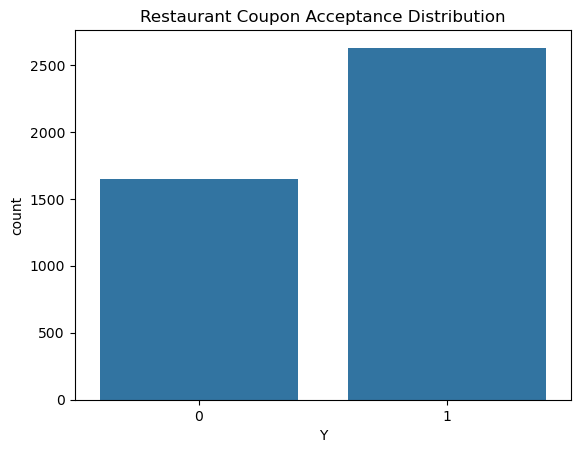

In [136]:
# Visualize restaurant coupon acceptance
display(sns.countplot(x='Y', data=restaurant_coupons))
plt.title("Restaurant Coupon Acceptance Distribution")
plt.show()


In [229]:
# Analysis: 
# Frequent restaurant-goers, especially high-income individuals, are prime targets for restaurant coupons.
# Parents with kids are less likely to accept restaurant coupons, so targeting individuals without kids might yield better results.
# Marketing efforts should focus on regular diners with higher incomes, using incentives like premium offers, loyalty programs, or exclusive deals to increase engagement.